# Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib

#### Load data

In [2]:
data = pd.read_csv("C:/Users/inbar/Downloads/Vijaiey/Impolex task/ML - Employee Salary Prediction/Employee_Salaries.csv")

# Exploratory Data Analysis and Data preprocessing

In [3]:
data.shape

(10291, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [5]:
data.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [6]:
unique_combinations = data[['Department', 'Department_Name']].drop_duplicates()
unique_combinations

,Department,Department_Name
0,ABS,Alcohol Beverage Services
462,BOA,Board of Appeals Department
465,BOE,Board of Elections
499,CAT,County Attorney's Office
577,CCL,County Council
708,CEC,Community Engagement Cluster
813,CEX,Offices of the County Executive
861,COR,Correction and Rehabilitation
1374,CUS,Community Use of Public Facilities
1404,DEP,Department of Environmental Protection


In [7]:
# Since department is the short term for departament we can keep any one
data.drop(columns="Department_Name", axis=1, inplace=True)

In [8]:
data.tail()

,Department,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
10286,TBS,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.0,0.00,N28
10287,ZAH,ZAH 05 Director,F,215032.1000,0.0,0.00,NaN
10288,ZAH,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.0,0.00,N18
10289,ZAH,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.0,1596.27,N21
10290,ZAH,ZAH 05 Zoning and Administrative Hearings,F,177976.3100,0.0,0.00,N35


In [9]:
## checking for null values
data.isna().sum()

Department        0
Division          0
Gender            0
Base_Salary       0
Overtime_Pay      0
Longevity_Pay     0
Grade            33
dtype: int64

In [10]:
data.describe()

,Base_Salary,Overtime_Pay,Longevity_Pay
count,10291.000000,10291.000000,10291.000000
mean,90312.165744,8081.288954,1533.882816
std,31240.842929,16491.833017,3209.041070
min,11147.240000,0.000000,0.000000
25%,70023.000000,0.000000,0.000000
50%,87328.000000,258.420000,0.000000
75%,108084.000000,9190.970000,1225.680000
max,292000.000000,227428.990000,20279.460000


In [11]:
data['Base_Salary'].describe()

count     10291.000000
mean      90312.165744
std       31240.842929
min       11147.240000
25%       70023.000000
50%       87328.000000
75%      108084.000000
max      292000.000000
Name: Base_Salary, dtype: float64

In [12]:
data[data.duplicated()]

,Department,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
17,ABS,ABS 85 Administrative Services,M,117424.0,0.0,0.00,N25
18,ABS,ABS 85 Administrative Services,M,117424.0,0.0,0.00,N25
225,ABS,ABS 85 Goshen Crossing,M,19695.5,0.0,0.00,12
512,CAT,CAT 30 Finance and Procurement,F,78947.0,0.0,3357.62,N16
517,CAT,CAT 30 Finance and Procurement,F,158802.0,0.0,0.00,N32
...,...,...,...,...,...,...,...
10246,TBS,TBS 34 ODT Technical Support Team,M,134500.0,0.0,0.00,N28
10248,TBS,TBS 34 ODT Web Solutions Team,F,134500.0,0.0,5747.80,N28
10266,TBS,TBS 34 OSP Employee Productivity Services,F,134500.0,0.0,2185.69,N28
10271,TBS,TBS 34 OSP Employee Productivity Services,M,134500.0,0.0,0.00,N28


In [13]:
duplicates = data[data.duplicated(keep=False)]  
print(duplicates)

      Department                                           Division Gender  \
9            ABS                     ABS 85 Administrative Services      M   
17           ABS                     ABS 85 Administrative Services      M   
18           ABS                     ABS 85 Administrative Services      M   
224          ABS                             ABS 85 Goshen Crossing      M   
225          ABS                             ABS 85 Goshen Crossing      M   
...          ...                                                ...    ...   
10266        TBS          TBS 34 OSP Employee Productivity Services      F   
10270        TBS          TBS 34 OSP Employee Productivity Services      M   
10271        TBS          TBS 34 OSP Employee Productivity Services      M   
10284        TBS  TBS 34 OSP Low Code Governance and Administration      M   
10286        TBS  TBS 34 OSP Low Code Governance and Administration      M   

       Base_Salary  Overtime_Pay  Longevity_Pay Grade  
9      

In [14]:
## Since the data is repeated, keeping only the first row and removing other duplicates
data.drop_duplicates(keep='first', inplace=True)

In [15]:
data.reset_index(drop=True, inplace=True)

In [16]:
data.shape

(9674, 7)

In [17]:
# numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
print("Numeric Columns:", numeric_columns.tolist())
# Summary statistics for numerical variables
summary_stats = data[numeric_columns].describe()
summary_stats

Numeric Columns: ['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']


,Base_Salary,Overtime_Pay,Longevity_Pay
count,9674.000000,9674.000000,9674.000000
mean,90725.643578,8594.192753,1573.027926
std,30774.245561,16879.186881,3256.385047
min,11147.240000,0.000000,0.000000
25%,71147.363700,0.000000,0.000000
50%,87328.000000,518.325000,0.000000
75%,108084.000000,10237.242500,1334.992500
max,292000.000000,227428.990000,20279.460000


The mean base salary is $90725.64
The base salary ranges from $11,147.24 to $292,000.00.

In [18]:
def plot_histograms(data, numeric_columns):
    for col in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

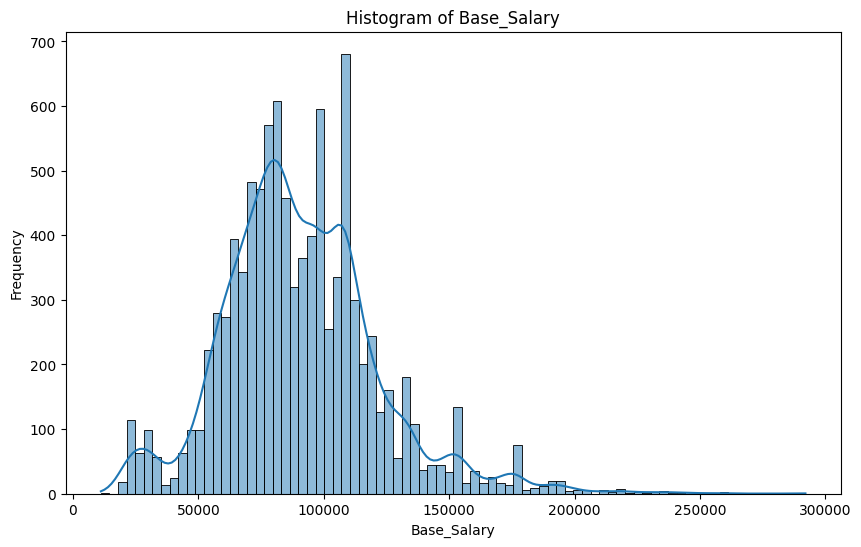

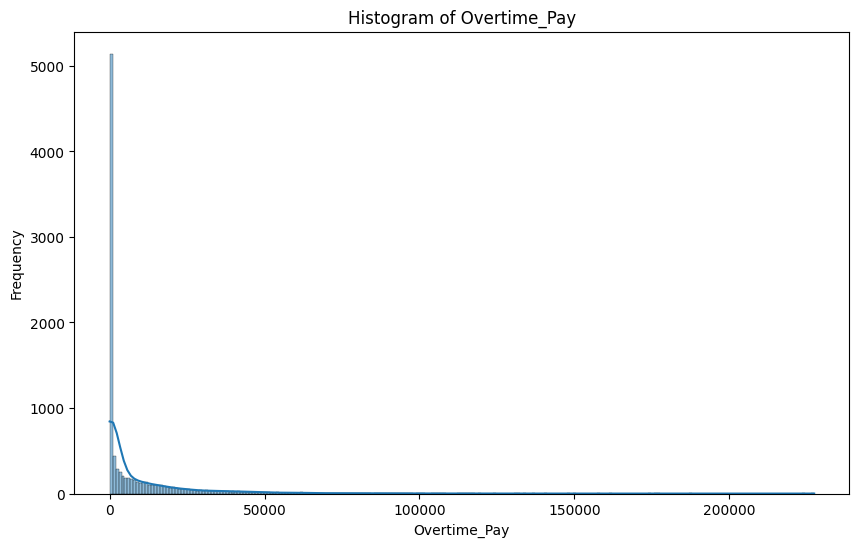

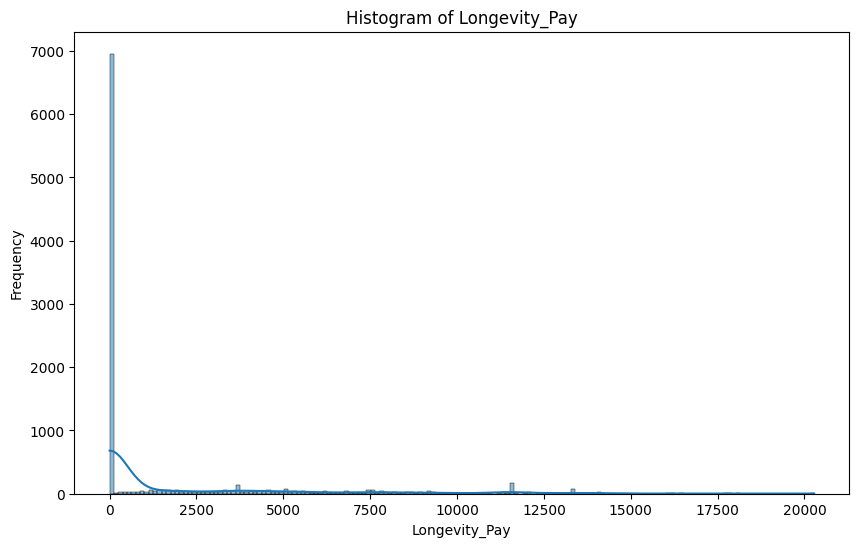

In [19]:
plot_histograms(data[['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']], numeric_columns)

From the above histogram we can see that base salary follows normal distribution, overtime_pay and longevity_pay are positively skewed, we can use log transformation to handle these condition

In [20]:
def log_transform(x):
    return np.log1p(x)

In [21]:
data['Overtime_Pay'] = log_transform(data['Overtime_Pay'])

In [22]:
data['Longevity_Pay'] = log_transform(data['Longevity_Pay'])

In [23]:
def plot_box_plots(data, numeric_columns):
    for col in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

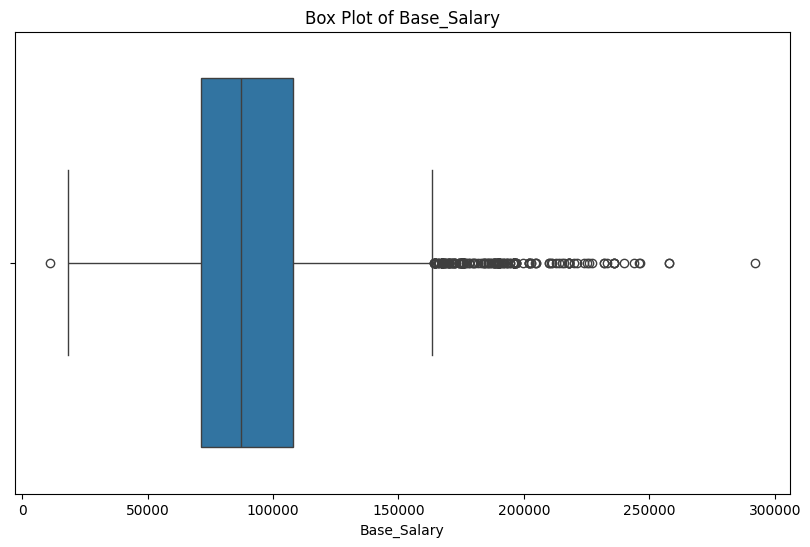

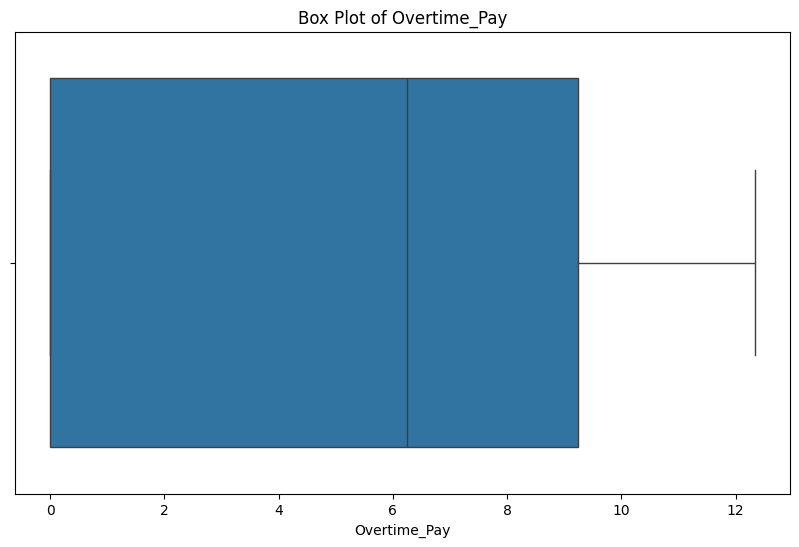

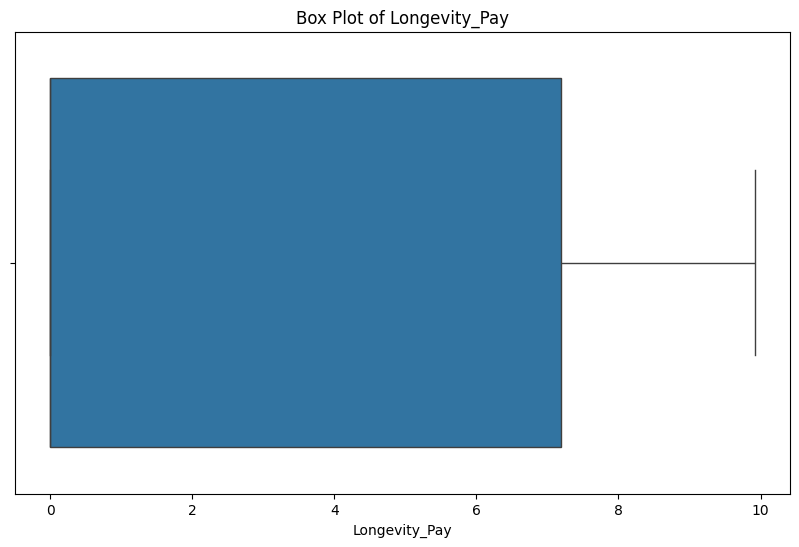

In [24]:
plot_box_plots(data[['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']], numeric_columns)

The base salary contains outliers need to be investigated further on how to handle outliers.

In [25]:
# categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns.tolist())

Categorical Columns: ['Department', 'Division', 'Gender', 'Grade']


In [26]:
cat_unique_value_count = {col: data[col].nunique() for col in categorical_columns}
cat_unique_value_count

{'Department': 42, 'Division': 627, 'Gender': 2, 'Grade': 98}

In [27]:
def plot_top_15_categories(data, categorical_columns):
    plt.figure(figsize=(10, 6))
    top_categories = data[categorical_columns].value_counts().index[:15]
    sns.countplot(y=data[categorical_columns], order=top_categories)
    plt.title(f'Bar Chart of {categorical_columns}')
    plt.show()

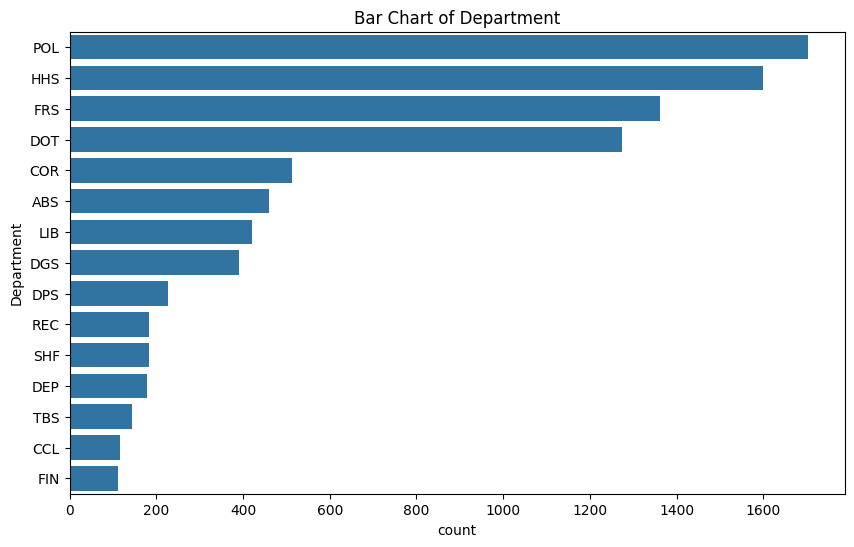

In [28]:
plot_top_15_categories(data, 'Department')

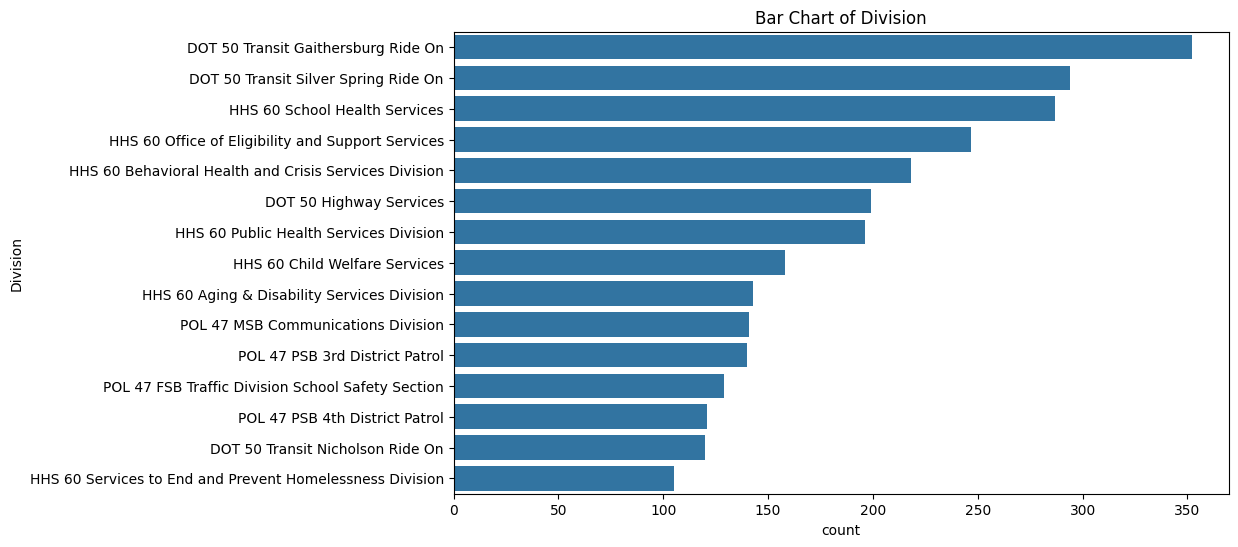

In [29]:
plot_top_15_categories(data, 'Division')

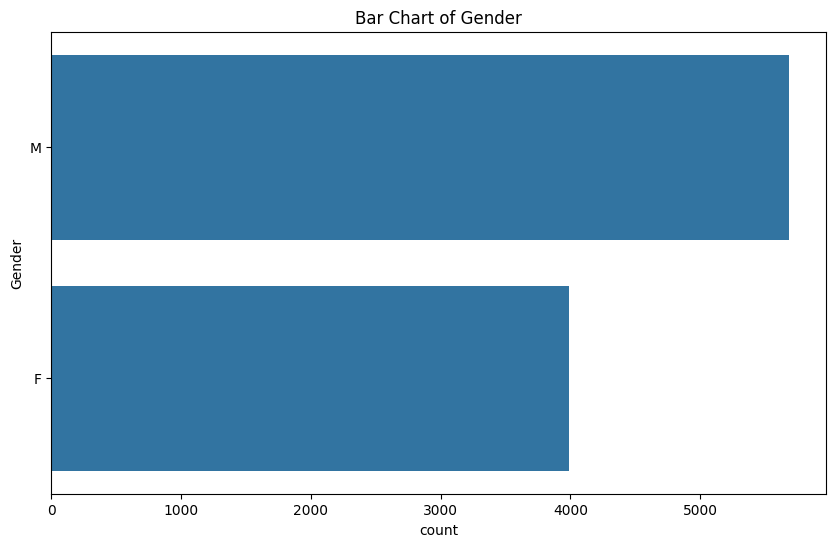

In [30]:
plot_top_15_categories(data, 'Gender')

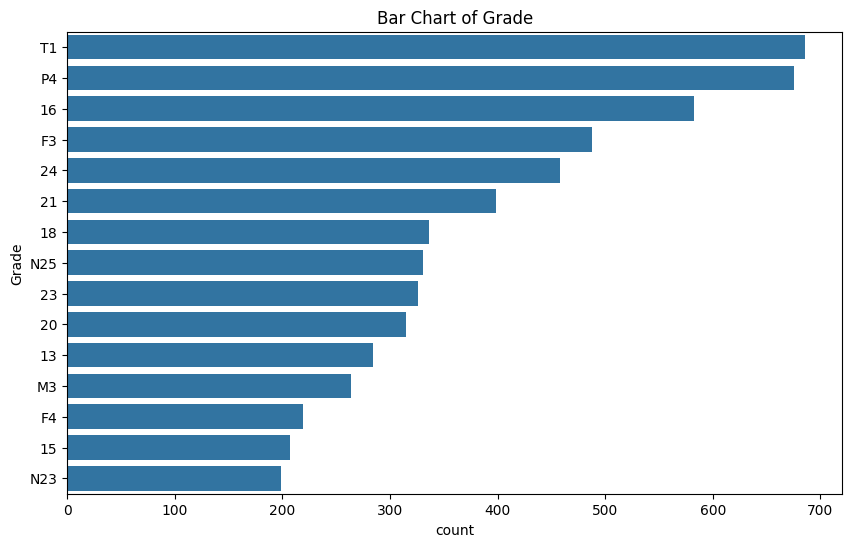

In [31]:
plot_top_15_categories(data, 'Grade')

In [32]:
def plot_scatter_plots(data, x_columns, y_column):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[x_columns], y=data[y_column])
    plt.title(f'Scatter Plot of {y_column} vs {x_columns}')
    plt.xlabel(x_columns)
    plt.ylabel(y_column)
    plt.show()

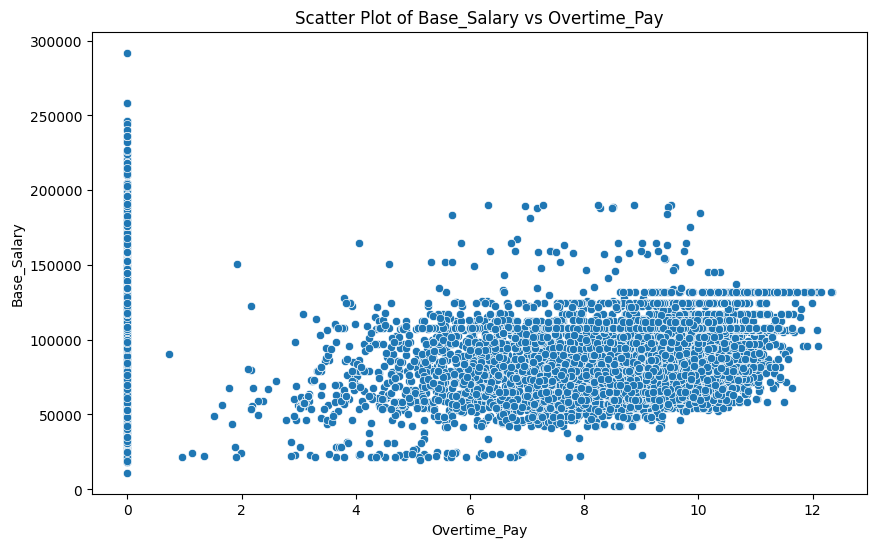

In [33]:
plot_scatter_plots(data, 'Overtime_Pay', 'Base_Salary')

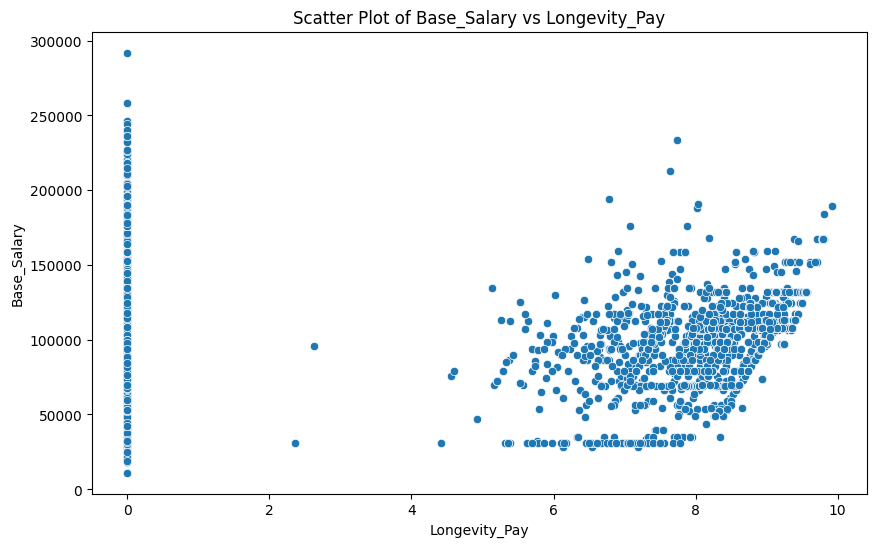

In [34]:
plot_scatter_plots(data, 'Longevity_Pay', 'Base_Salary')

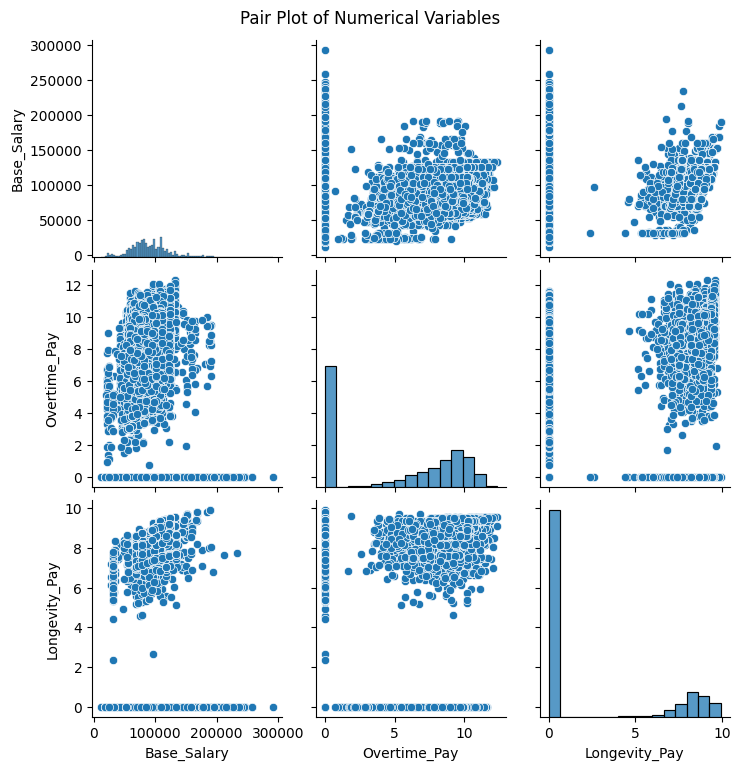

In [35]:
sns.pairplot(data[numeric_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

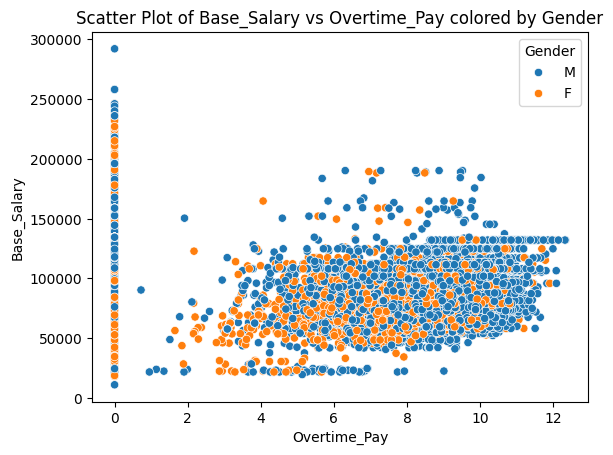

In [36]:
sns.scatterplot(data=data, x='Overtime_Pay', y='Base_Salary', hue='Gender')
plt.title('Scatter Plot of Base_Salary vs Overtime_Pay colored by Gender')
plt.show()

In [37]:
def plot_categorical_mean_vs_target(data, categorical_column, target_column):
    plt.figure(figsize=(15, 10))
    # Calculate mean target values for each category
    mean_values = data.groupby(categorical_column)[target_column].mean()
    # Sort values and select top 20 categories
    top_mean_values = mean_values.sort_values(ascending=False).head(20)
    sns.barplot(x=top_mean_values.index, y=top_mean_values.values)
    plt.title(f'Mean {target_column} by {categorical_column}')
    plt.xticks(rotation=45)
    plt.xlabel(categorical_column)
    plt.ylabel(f'Mean {target_column}')
    plt.show()

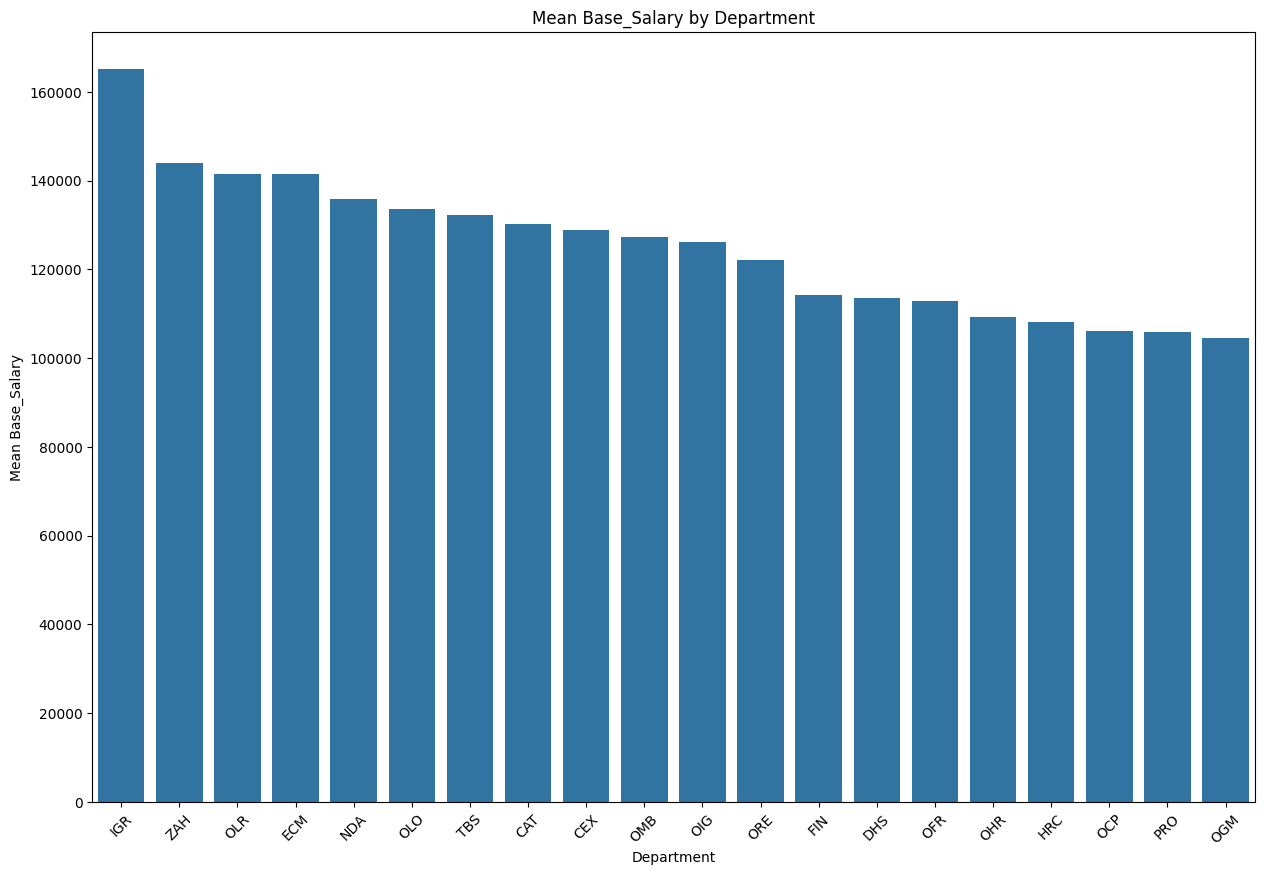

In [38]:
plot_categorical_mean_vs_target(data, 'Department', 'Base_Salary')

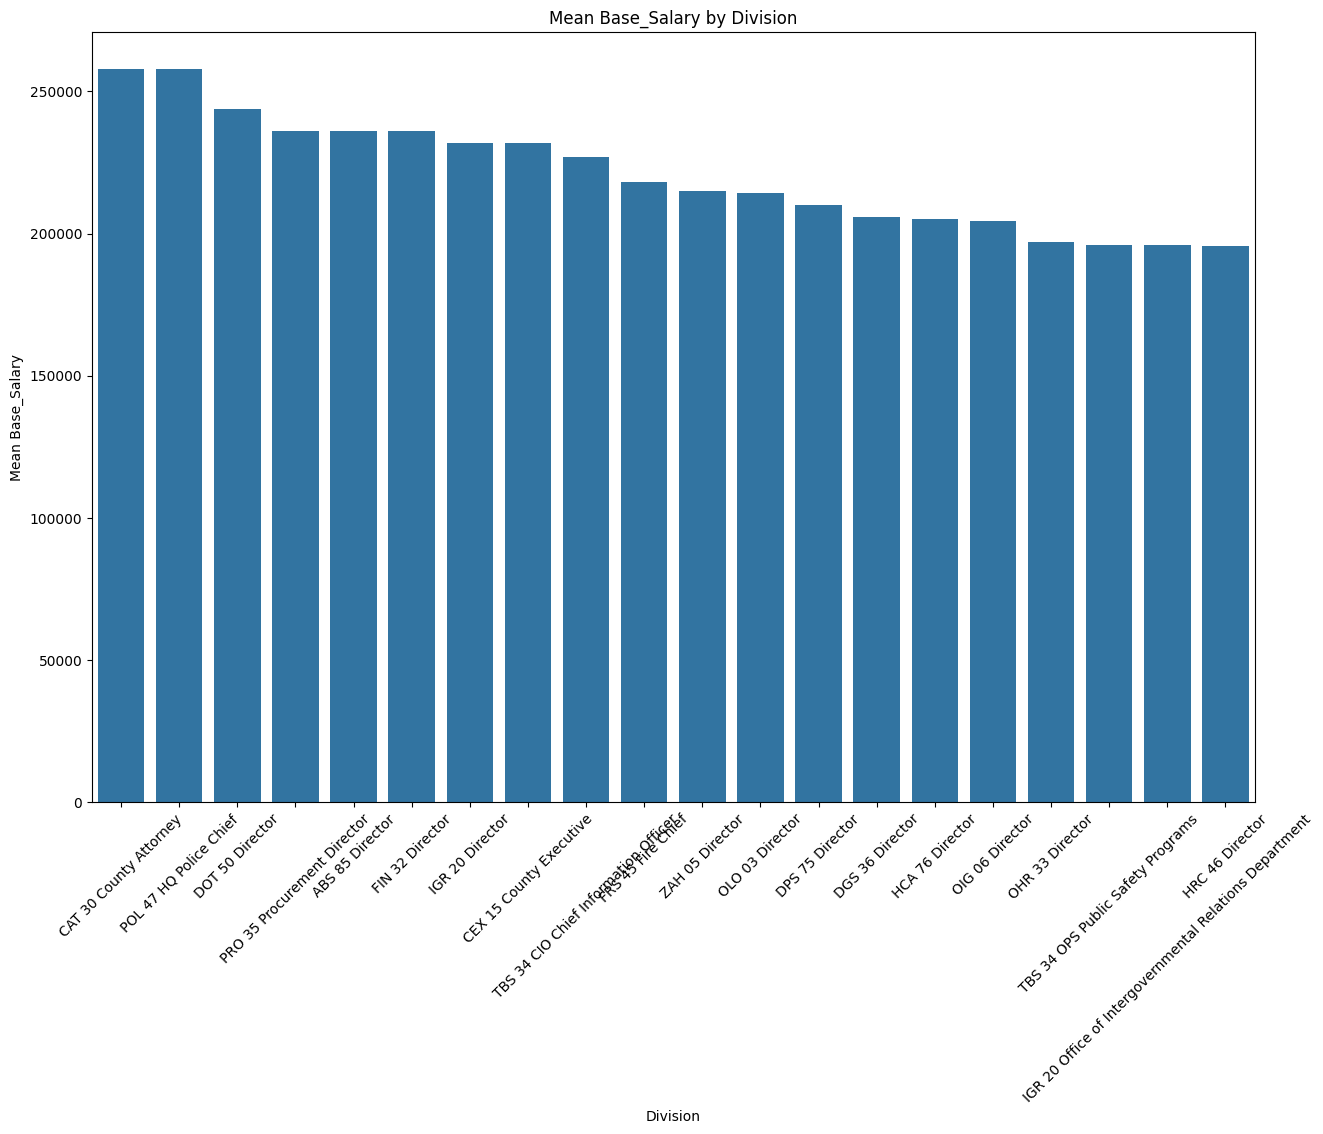

In [39]:
plot_categorical_mean_vs_target(data, 'Division', 'Base_Salary')

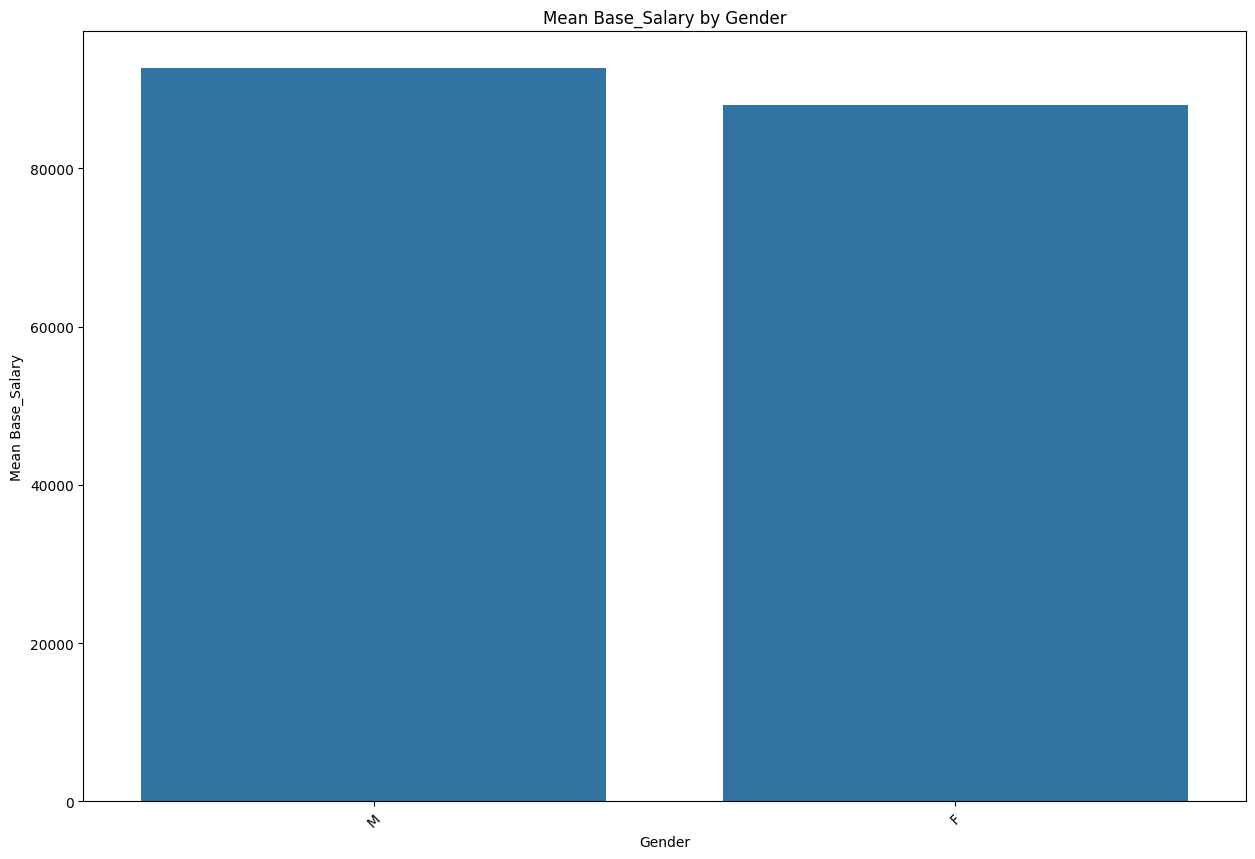

In [40]:
plot_categorical_mean_vs_target(data, 'Gender', 'Base_Salary')

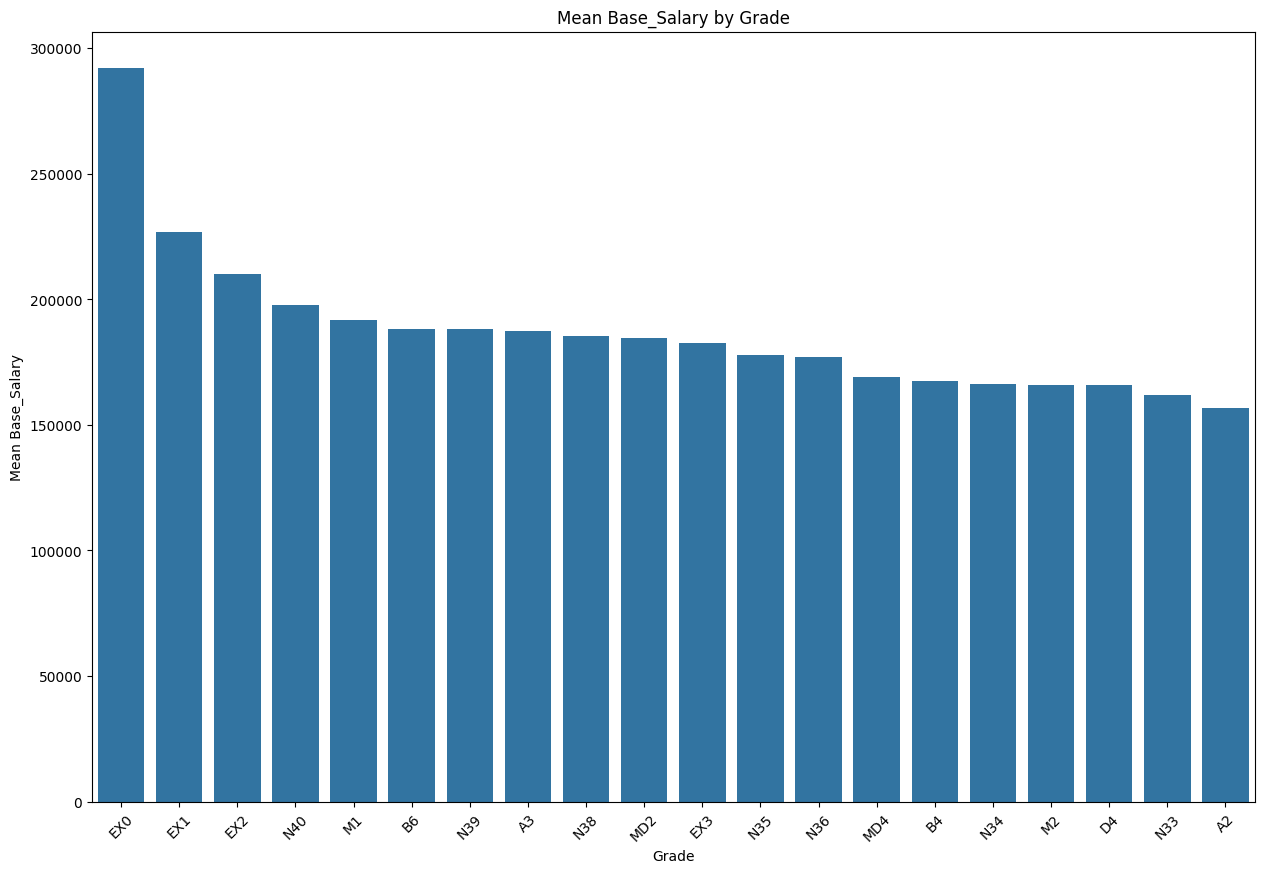

In [41]:
plot_categorical_mean_vs_target(data, 'Grade', 'Base_Salary')

From the above we can see the top 20 department, division, grade with average base salary.
The male average base salary is greater than female.

In [42]:
def fill_grade(df):
    # Calculate the most common grade for each group
    mode_grades = df.groupby(['Department', 'Division', 'Gender'])['Grade'].agg(lambda x: x.mode()[0] if not x.mode().empty else data['Grade'].mode()[0])
    
    # Map the calculated mode grades back to the original DataFrame
    df['Grade'] = df.apply(lambda row: mode_grades.get((row['Department'], row['Division'], row['Gender']), np.nan) if pd.isna(row['Grade']) else row['Grade'], axis=1)
    
    return df

# Fill missing values
data = fill_grade(data)
print(data)

     Department                                           Division Gender  \
0           ABS                              ABS 85 Administration      M   
1           ABS                              ABS 85 Administration      M   
2           ABS                              ABS 85 Administration      F   
3           ABS                     ABS 85 Administrative Services      F   
4           ABS                     ABS 85 Administrative Services      F   
...         ...                                                ...    ...   
9669        TBS  TBS 34 OSP Low Code Governance and Administration      M   
9670        ZAH                                    ZAH 05 Director      F   
9671        ZAH  ZAH 05 Office of Zoning and Administrative Hea...      F   
9672        ZAH          ZAH 05 Zoning and Administrative Hearings      F   
9673        ZAH          ZAH 05 Zoning and Administrative Hearings      F   

      Base_Salary  Overtime_Pay  Longevity_Pay Grade  
0     175873.0000   

In [43]:
data.isna().sum()

Department       0
Division         0
Gender           0
Base_Salary      0
Overtime_Pay     0
Longevity_Pay    0
Grade            0
dtype: int64

## Encoding

In [44]:
for col in categorical_columns:
    print(f'{col}: {data[col].nunique()}')

Department: 42
Division: 627
Gender: 2
Grade: 98


The "Department", "Division", "Gender" in a company is typically a type of categorical data called nominal categorical data. Nominal data represents categories with no inherent order or ranking among them. Each division is a distinct category without a specific hierarchy or quantitative value associated with it.
The "Grade" in a company can be considered ordinal categorical data. This is because grades often represent a hierarchy or ranking system, such as Junior, Mid-Level, Senior, or Executive. The categories have a meaningful order or progression, but the exact differences between grades are not always quantifiable.

In [45]:
label_encoder = LabelEncoder()

In [46]:
columns_to_encode = ['Gender', 'Department', 'Division']
encoded_dict = {}
# Apply label encoding to each column
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])
    encoded_dict[column] = {label: idx for idx, label in enumerate(label_encoder.classes_)}

In [47]:
encoded_dict['Gender']

{'F': 0, 'M': 1}

In [48]:
encoded_dict['Department']

{'ABS': 0,
 'BOA': 1,
 'BOE': 2,
 'CAT': 3,
 'CCL': 4,
 'CEC': 5,
 'CEX': 6,
 'COR': 7,
 'CUS': 8,
 'DEP': 9,
 'DGS': 10,
 'DHS': 11,
 'DOT': 12,
 'DPS': 13,
 'ECM': 14,
 'FIN': 15,
 'FRS': 16,
 'HCA': 17,
 'HHS': 18,
 'HRC': 19,
 'IGR': 20,
 'LIB': 21,
 'MPB': 22,
 'NDA': 23,
 'OAG': 24,
 'OAS': 25,
 'OCP': 26,
 'OFR': 27,
 'OGM': 28,
 'OHR': 29,
 'OIG': 30,
 'OLO': 31,
 'OLR': 32,
 'OMB': 33,
 'ORE': 34,
 'PIO': 35,
 'POL': 36,
 'PRO': 37,
 'REC': 38,
 'SHF': 39,
 'TBS': 40,
 'ZAH': 41}

In [49]:
encoded_dict['Division']

{'ABS 85 Administration': 0,
 'ABS 85 Administrative Services': 1,
 'ABS 85 Aspen Hill': 2,
 'ABS 85 Beer Delivery Operations': 3,
 'ABS 85 Beer Loading': 4,
 'ABS 85 Beer Warehouse Operations': 5,
 'ABS 85 Burtonsville': 6,
 'ABS 85 Cabin John': 7,
 'ABS 85 Clarksburg Village': 8,
 'ABS 85 Cloverly': 9,
 'ABS 85 Darnestown': 10,
 'ABS 85 Director': 11,
 "ABS 85 Director's Office": 12,
 'ABS 85 Downtown Rockville': 13,
 'ABS 85 Fallsgrove': 14,
 'ABS 85 Flower Avenue': 15,
 'ABS 85 Gaithersburg Square': 16,
 'ABS 85 Goshen Crossing': 17,
 'ABS 85 Hampden Lane': 18,
 'ABS 85 IT Administration': 19,
 'ABS 85 Kensington': 20,
 'ABS 85 King Farm': 21,
 'ABS 85 Kingsview': 22,
 'ABS 85 Leisure World': 23,
 'ABS 85 Licensure, Regulation and Education': 24,
 'ABS 85 Liquor and WIne Loading': 25,
 'ABS 85 Liquor and Wine Delivery Operations': 26,
 'ABS 85 Montrose': 27,
 'ABS 85 Muddy Branch': 28,
 'ABS 85 Olney': 29,
 'ABS 85 Poolesville': 30,
 'ABS 85 Potomac': 31,
 'ABS 85 Purchasing': 32,


In [50]:
data.head()

,Department,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,0,0,1,175873.000,0.00000,0.000000,M2
1,0,0,1,145613.360,0.00000,0.000000,M3
2,0,0,0,136970.000,0.00000,0.000000,M3
3,0,1,0,89432.694,0.00000,7.820440,21
4,0,1,0,78947.000,6.12617,8.741728,16


In [51]:
# Calculate the average base salary for each grade
average_salaries = data.groupby('Grade')['Base_Salary'].mean()

# Sort the grades based on average salary in descending order
grade_order = average_salaries.sort_values(ascending=False).index.tolist()

In [52]:
# Create a dictionary that maps each grade to its rank
grade_order_dict = {grade: rank for rank, grade in enumerate(grade_order)}

# Print the grade order dictionary
print(grade_order_dict)

{'EX0': 0, 'EX1': 1, 'EX2': 2, 'N40': 3, 'M1': 4, 'B6': 5, 'N39': 6, 'A3': 7, 'N38': 8, 'MD2': 9, 'EX3': 10, 'N35': 11, 'N36': 12, 'MD4': 13, 'B4': 14, 'N34': 15, 'M2': 16, 'D4': 17, 'N33': 18, 'A2': 19, 'B3': 20, 'N32': 21, 'MD3': 22, 'N31': 23, 'D3': 24, 'M3': 25, 'N30': 26, '28': 27, 'B2': 28, 'N29': 29, '27': 30, 'C2': 31, 'N28': 32, 'A1': 33, 'D2': 34, '26': 35, 'N27': 36, 'B1': 37, 'C1': 38, '25': 39, 'P5': 40, 'N26': 41, 'N25': 42, 'N24': 43, 'D1': 44, 'F4': 45, 'P4': 46, 'C6': 47, '24': 48, 'N23': 49, '23': 50, '22': 51, 'N22': 52, 'N21': 53, 'T2': 54, 'G4': 55, 'N20': 56, 'F3': 57, 'G1': 58, 'N18': 59, '21': 60, 'N19': 61, '20': 62, '19': 63, 'C5': 64, 'N17': 65, 'T1': 66, 'P3': 67, '18': 68, 'F2': 69, '17': 70, '16': 71, 'N16': 72, 'N15': 73, 'G3': 74, 'P2': 75, 'C4': 76, '15': 77, 'N13': 78, 'P1': 79, '14': 80, 'N14': 81, 'F1': 82, 'G2': 83, 'T1P': 84, 'S1': 85, '9': 86, 'C3': 87, '11': 88, '13': 89, 'P4P': 90, '7': 91, 'F3P': 92, '12': 93, '8': 94, '5': 95, '10': 96, 'N5': 

In [53]:
# Create an OrdinalEncoder object with the custom order
ordinal_encoder = OrdinalEncoder(categories=[grade_order])

# Fit and transform the 'Grade' column
data['Grade'] = ordinal_encoder.fit_transform(data[['Grade']])

In [54]:
data.head()

,Department,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,0,0,1,175873.000,0.00000,0.000000,16.0
1,0,0,1,145613.360,0.00000,0.000000,25.0
2,0,0,0,136970.000,0.00000,0.000000,25.0
3,0,1,0,89432.694,0.00000,7.820440,60.0
4,0,1,0,78947.000,6.12617,8.741728,71.0


In [55]:
corr = data.corr()
corr

,Department,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
Department,1.000000,0.958935,-0.072486,0.127283,-0.015026,0.141763,-0.185322
Division,0.958935,1.000000,-0.122809,0.125277,-0.066374,0.130560,-0.200497
Gender,-0.072486,-0.122809,1.000000,0.075788,0.385684,0.046981,-0.046381
Base_Salary,0.127283,0.125277,0.075788,1.000000,-0.101046,0.231381,-0.890710
Overtime_Pay,-0.015026,-0.066374,0.385684,-0.101046,1.000000,0.088886,0.116422
Longevity_Pay,0.141763,0.130560,0.046981,0.231381,0.088886,1.000000,-0.130480
Grade,-0.185322,-0.200497,-0.046381,-0.890710,0.116422,-0.130480,1.000000


<Axes: >

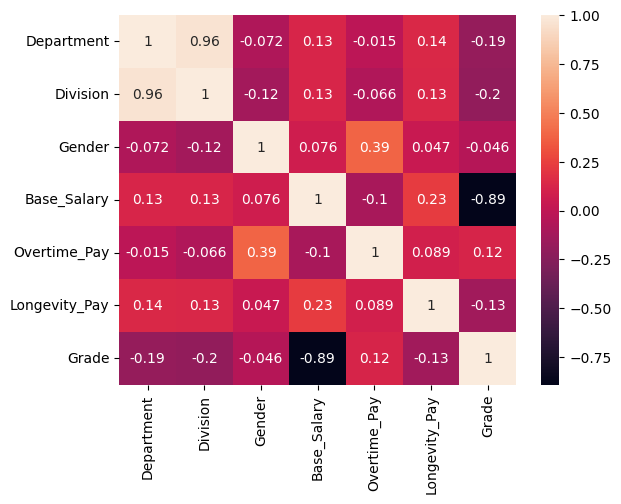

In [56]:
sns.heatmap(corr, annot=True)

In [57]:
# Print the correlation of each feature with target('Base_Salary')
print(corr['Base_Salary'])

Department       0.127283
Division         0.125277
Gender           0.075788
Base_Salary      1.000000
Overtime_Pay    -0.101046
Longevity_Pay    0.231381
Grade           -0.890710
Name: Base_Salary, dtype: float64


From the above correlation, we can find that division and department are 95% correlated, indicating a high degree of multicollinearity between these features. Multicollinearity can cause issues in regression models by making it difficult to determine the individual effect of each predictor variable on the target variable. Therefore, to avoid redundancy and improve model interpretability and performance, we should consider removing one of the highly correlated features 

In [58]:
data.drop(columns="Division", axis=1, inplace=True)

In [59]:
data.to_csv("C:/Users/inbar/Downloads/Vijaiey/Impolex task/ML - Employee Salary Prediction/final.csv")

# Model training

In [60]:
# Splitting columns with respect to input and target
X = data.drop('Base_Salary', axis=1)  
y = data['Base_Salary']  

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear regression

In [61]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)

In [63]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 182516069.8782248
Mean Absolute Error: 9307.703156545924
R-squared Score: 0.7974281341600709


In [64]:
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

R-squared: 0.7974281341600709
Adjusted R-squared: 0.7969030645233681


In [65]:
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [ -144.64504837  2250.2684141   -186.92937494  1010.0271622
 -1450.81110938]
Intercept: 172293.98443501076


#### Decision Tree

In [66]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [67]:
y_pred = model.predict(X_test)

In [68]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 179837928.98691237
Root Mean Squared Error: 13410.36647474305
Mean Absolute Error: 7666.531774739722
R-squared Score: 0.8004005628218175


In [69]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor(random_state=42)

In [70]:
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)

In [71]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


c:\Users\inbar\Downloads\Vijaiey\Impolex task\ML - Employee Salary Prediction\venv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [72]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [73]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 124103209.99552147
Root Mean Squared Error: 11140.162027345988
Mean Absolute Error: 6782.632913961454
R-squared Score: 0.8622596967911337


In [74]:
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

R-squared: 0.8622596967911337
Adjusted R-squared: 0.8619026716402554


#### XG Boosting

In [76]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost Root Mean Squared Error: {rmse_xgb}")
print(f"XGBoost Mean Absolute Error: {mae_xgb}")
print(f"XGBoost R-squared Score: {r2_xgb}")


XGBoost Mean Squared Error: 115216456.95928675
XGBoost Root Mean Squared Error: 10733.892907947551
XGBoost Mean Absolute Error: 6815.72630065407
XGBoost R-squared Score: 0.8721229715428299


#### Random forest

In [78]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
y_pred_rf = rf_model.predict(X_test)

In [80]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest Mean Absolute Error: {mae_rf}")
print(f"Random Forest R-squared Score: {r2_rf}")

Random Forest Mean Squared Error: 132273238.20907713
Random Forest Root Mean Squared Error: 11501.01031253677
Random Forest Mean Absolute Error: 6909.67541785147
Random Forest R-squared Score: 0.853191904238461


In [89]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                              cv=5, scoring='neg_mean_squared_error', 
                              verbose=2, n_jobs=-1)

best_model = grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

best_rf_model = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest Mean Squared Error: {mse_best_rf}")
print(f"Best Random Forest Root Mean Squared Error: {rmse_best_rf}")
print(f"Best Random Forest Mean Absolute Error: {mae_best_rf}")
print(f"Best Random Forest R-squared Score: {r2_best_rf}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Mean Squared Error: 113334741.13420777
Best Random Forest Root Mean Squared Error: 10645.879068175054
Best Random Forest Mean Absolute Error: 6628.637700985206
Best Random Forest R-squared Score: 0.8742114598930398


In [82]:
# Number of observations and predictors
n = len(y_test)
p = X_test.shape[1]

# Calculate Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2_best_rf) * (n - 1) / (n - p - 1))

print(f"R-squared: {r2_best_rf}")
print(f"Best Random Forest Adjusted R-squared: {adjusted_r2}")

R-squared: 0.8742114598930398
Best Random Forest Adjusted R-squared: 0.8738854139103883


In [96]:
joblib.dump(best_model, 'model.joblib')

['model.joblib']

# Prediction

In [107]:
encoders = {
    'Gender' : {'F': 0, 'M': 1},
    'Department': {'ABS': 0,
 'BOA': 1,
 'BOE': 2,
 'CAT': 3,
 'CCL': 4,
 'CEC': 5,
 'CEX': 6,
 'COR': 7,
 'CUS': 8,
 'DEP': 9,
 'DGS': 10,
 'DHS': 11,
 'DOT': 12,
 'DPS': 13,
 'ECM': 14,
 'FIN': 15,
 'FRS': 16,
 'HCA': 17,
 'HHS': 18,
 'HRC': 19,
 'IGR': 20,
 'LIB': 21,
 'MPB': 22,
 'NDA': 23,
 'OAG': 24,
 'OAS': 25,
 'OCP': 26,
 'OFR': 27,
 'OGM': 28,
 'OHR': 29,
 'OIG': 30,
 'OLO': 31,
 'OLR': 32,
 'OMB': 33,
 'ORE': 34,
 'PIO': 35,
 'POL': 36,
 'PRO': 37,
 'REC': 38,
 'SHF': 39,
 'TBS': 40,
 'ZAH': 41},
'Grade': {'EX0': 0, 'EX1': 1, 'EX2': 2, 'N40': 3, 'M1': 4, 'B6': 5, 'N39': 6, 'A3': 7, 'N38': 8, 'MD2': 9, 'EX3': 10, 'N35': 11, 'N36': 12, 'MD4': 13, 'B4': 14, 'N34': 15, 'M2': 16, 'D4': 17, 'N33': 18, 'A2': 19, 'B3': 20,
           'N32': 21, 'MD3': 22, 'N31': 23, 'D3': 24, 'M3': 25, 'N30': 26, '28': 27, 'B2': 28, 'N29': 29, '27': 30, 'C2': 31, 'N28': 32, 'A1': 33, 'D2': 34, '26': 35, 'N27': 36, 'B1': 37, 'C1': 38, '25': 39, 'P5': 40, 'N26': 41,
             'N25': 42, 'N24': 43, 'D1': 44, 'F4': 45, 'P4': 46, 'C6': 47, '24': 48, 'N23': 49, '23': 50, '22': 51, 'N22': 52, 'N21': 53, 'T2': 54, 'G4': 55, 'N20': 56, 'F3': 57, 'G1': 58, 'N18': 59, '21': 60, 'N19': 61, 
             '20': 62, '19': 63, 'C5': 64, 'N17': 65, 'T1': 66, 'P3': 67, '18': 68, 'F2': 69, '17': 70, '16': 71, 'N16': 72, 'N15': 73, 'G3': 74, 'P2': 75, 'C4': 76, '15': 77, 'N13': 78, 'P1': 79, '14': 80, 'N14': 81, 'F1': 82, 
             'G2': 83, 'T1P': 84, 'S1': 85, '9': 86, 'C3': 87, '11': 88, '13': 89, 'P4P': 90, '7': 91, 'F3P': 92, '12': 93, '8': 94, '5': 95, '10': 96, 'N5': 97}
}

In [108]:
joblib.dump(encoders, 'encoders.joblib')

['encoders.joblib']

In [5]:
# Load the saved model and encoders
model = joblib.load('model.joblib')
encoders = joblib.load('encoders.joblib')  # Assuming encoders are stored in a dictionary of mappings

# Log transform function
def log_transform(value):
    return np.log(value + 1)  # Adding 1 to avoid log(0)

# Prediction function for a new employee
def predict_salary(model, encoders, employee_data):
        # Extract the data
    department = employee_data['Department']
    gender = employee_data['Gender']
    overtime_pay = employee_data['Overtime_Pay']
    longevity_pay = employee_data['Longevity_Pay']
    grade = employee_data['Grade']
    
    # Encode categorical features using mappings
    department_encoded = encoders['Department'].get(department)
    gender_encoded = encoders['Gender'].get(gender)
    grade_encoded = encoders['Grade'].get(grade)
    
    # Log transform numerical features
    overtime_pay_log = log_transform(overtime_pay)
    longevity_pay_log = log_transform(longevity_pay)
    
    # Prepare the input data
    input_data = pd.DataFrame({
        'Department': [department_encoded],
        'Gender': [gender_encoded],
        'Overtime_Pay': [overtime_pay_log],
        'Longevity_Pay': [longevity_pay_log],
        'Grade': [grade_encoded]
    })
    
    # Predict using the loaded model
    predicted_salary = model.predict(input_data)
    
    return round(predicted_salary[0], 2)
    

# Define the new employee data
new_employee = {
    'Department': 'ABS',
    'Gender': 'F',
    'Overtime_Pay': 0,
    'Longevity_Pay': 0,
    'Grade': 'N27'
}

# Predict the salary
predicted_salary = predict_salary(model, encoders, new_employee)
print(f'Predicted Salary: {predicted_salary}')


Predicted Salary: 110279.38
